# Wisdom of Crowds 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
#sns.set(style="ticks", context="talk")
#plt.style.use("dark_background")

In [2]:
df = pd.read_csv('02-1-bean-data-full-x.csv', header=None)
df.head()

,0
0,219
1,244
2,260
3,269
4,273


In [3]:
df.describe()

,0
count,915.000000
mean,2408.745355
std,2422.170502
min,219.000000
25%,1110.000000
50%,1775.000000
75%,2599.500000
max,31337.000000


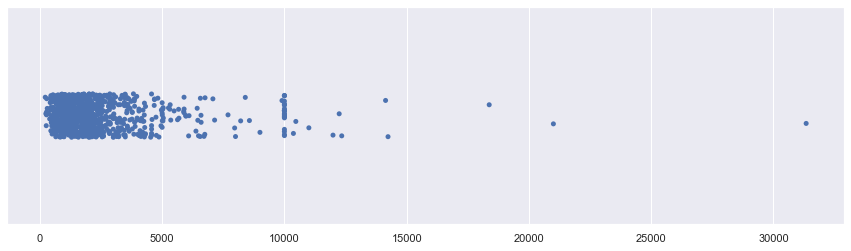

In [4]:
plt.figure(figsize=(15,4))
sns.stripplot(x=df.values);
plt.savefig('strip-plot.png')

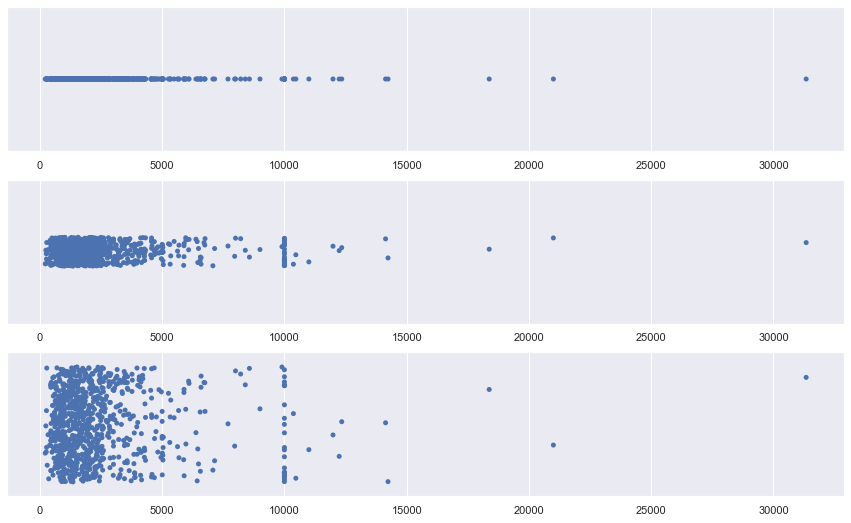

In [5]:
fig, ax = plt.subplots(3, 1, figsize=(15,9))
jitter=[0, .1, .4]
for k in range(3):
    sns.stripplot(x=df.values, jitter=jitter[k], ax=ax[k]);

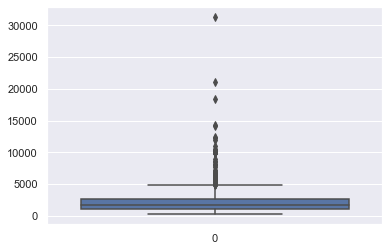

In [6]:
sns.boxplot(data=df.values);

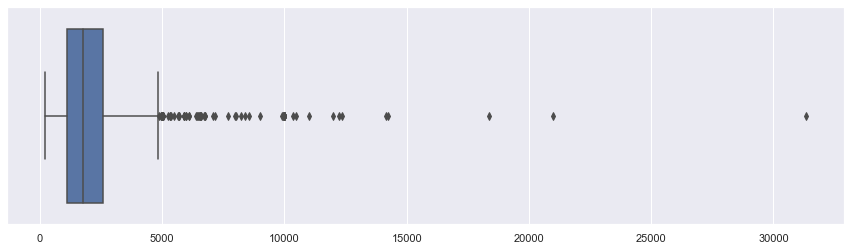

In [7]:
plt.figure(figsize=(15,4))
sns.boxplot(x=df.values);
plt.savefig('box-whisker.png')

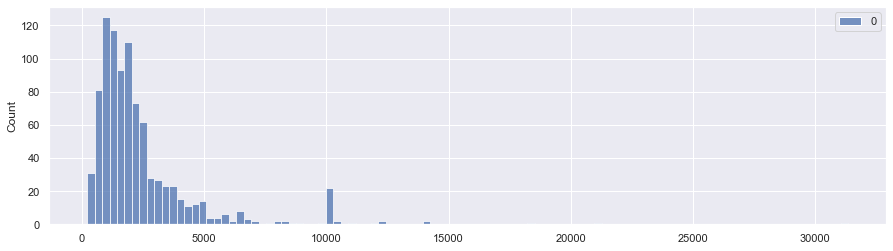

In [16]:
plt.figure(figsize=(15,4))
sns.histplot(data=df.values);
plt.savefig('histplot.png')

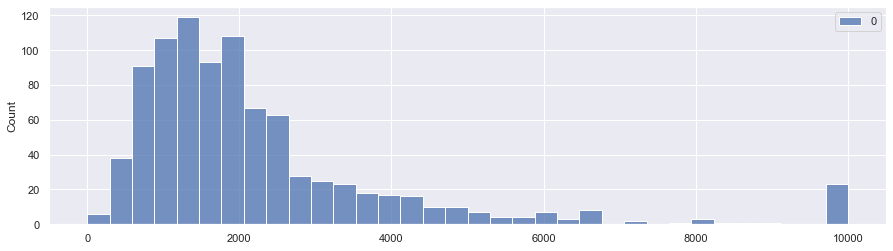

In [9]:
plt.figure(figsize=(15,4))
sns.histplot(data=df.values, binrange=[0, 10001]);
plt.savefig('histplot.png')

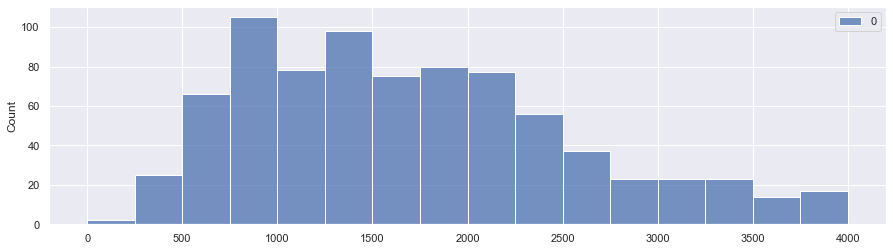

In [10]:
plt.figure(figsize=(15,4))
sns.histplot(data=df.values, binrange=[0, 4000]);
plt.savefig('histplot.png')

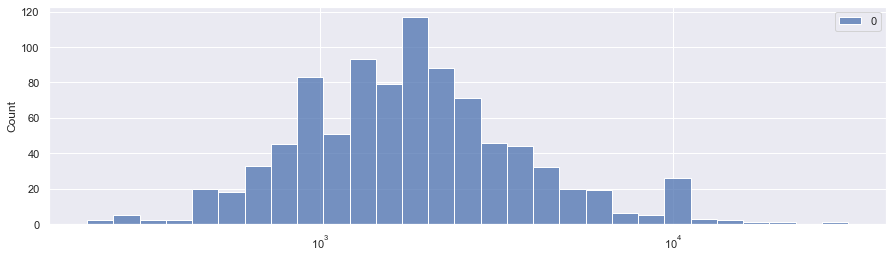

In [17]:
plt.figure(figsize=(15,4))
sns.histplot(data=df.values, log_scale=True);
plt.savefig('histplot-log10.png')

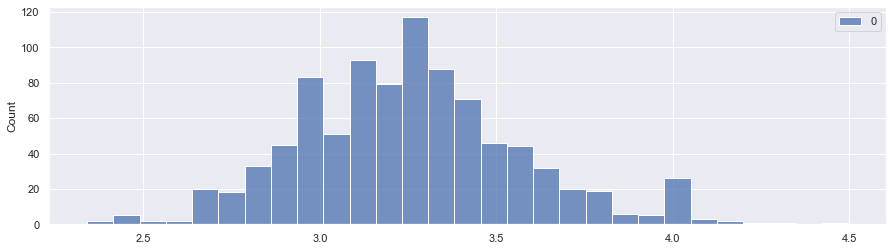

In [11]:
log10_data = np.log10(df.values)
plt.figure(figsize=(15,4))
sns.histplot(data=log10_data, );
plt.savefig('histplot-log10.png')

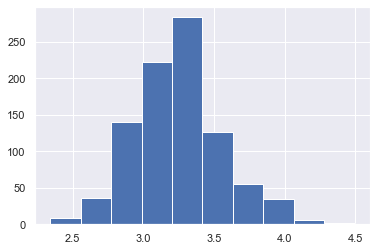

In [15]:
plt.hist(log10_data);

## Summary Statistics

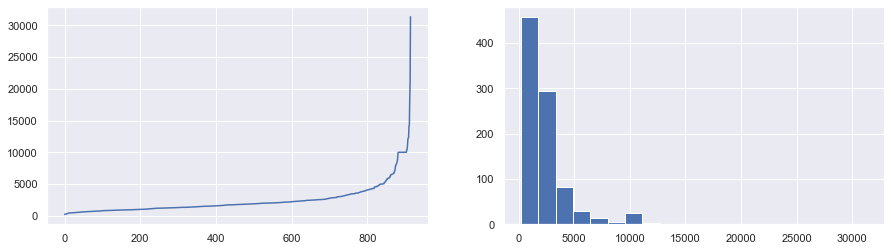

In [57]:
data = df.values
len(data)

fig, ax = plt.subplots(1,2, figsize=(15,4))
ax[0].plot(data);
ax[1].hist(data, bins=20);

#### Remove extreme values, unreasonable

In [87]:
data = data[data < 10000]
data = df.values
len(data)

915

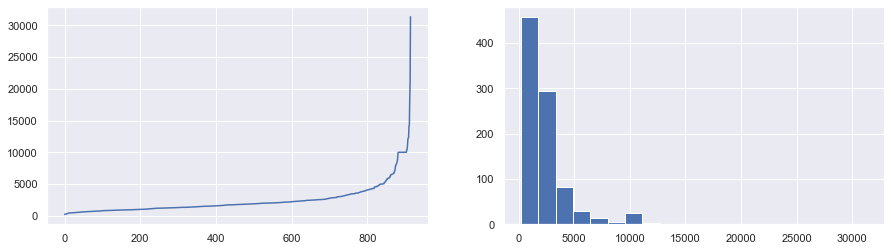

In [88]:
fig, ax = plt.subplots(1,2, figsize=(15,4))
ax[0].plot(data);
ax[1].hist(data, bins=20);

In [89]:
data.mean(), np.mean(data)

(2408.7453551912567, 2408.7453551912567)

### Median

In [90]:
np.median(data)

1775.0

In [91]:
data_sorted = np.sort(data)
median = data_sorted[len(data)//2]
median

array([1775], dtype=int64)

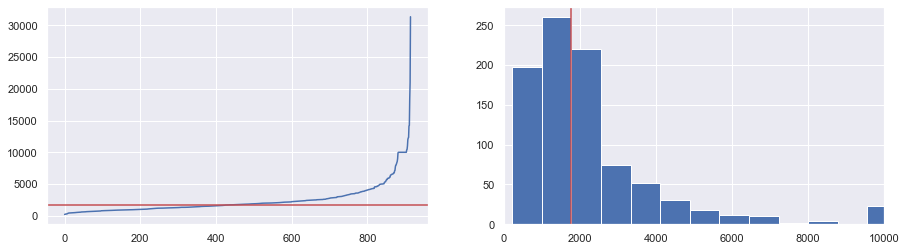

In [100]:
fig, ax = plt.subplots(1,2, figsize=(15,4))
ax[0].plot(data);
ax[0].axhline(median, c='r')
ax[1].set_xlim([0, 10000])
ax[1].hist(data, bins=40);
ax[1].axvline(median, c='r');

### Mode

In [104]:
v, c = np.unique(data[data<10000], return_counts=True)

In [135]:
# mode of data
i = np.argmax(c)
mode = v[i]
mode

1337

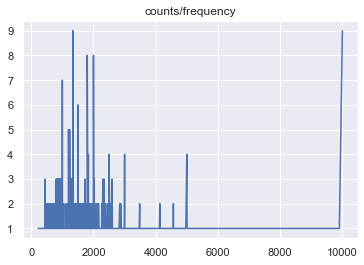

In [108]:
plt.plot(v, c);
plt.title('counts/frequency');
# plt.axvline(median, c='r');

### Geometric Mean

In [124]:
mean_log10 = np.mean(np.log10(data))
geometric_mean = np.power(10., mean_log10)
geometric_mean

1799.5281604527092

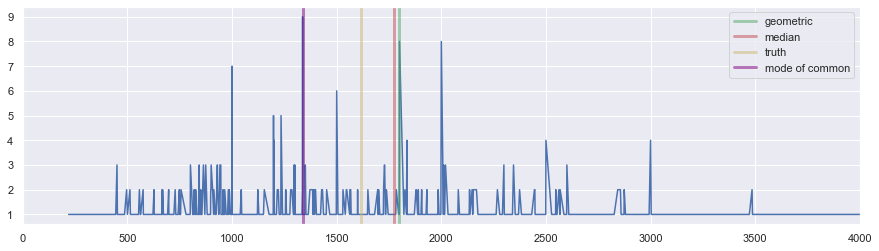

In [158]:
plt.figure(figsize=(15,4))
# plt.hist(data[:800], bins=80);
plt.plot(v, c)
plt.xlim([0, 4000])
plt.axvline(geometric_mean, c='g', label='geometric', alpha=.5, lw=3);
plt.axvline(median, c='r', label='median', alpha=.5, lw=3)
plt.axvline(true_value, c='y', label='truth', alpha=.5, lw=3)
plt.axvline(mode, c='purple', label='mode of common', alpha=.5, lw=3)
plt.legend();

### How many below/above the true value?

In [109]:
true_value = 1616

In [110]:
below = data < true_value
below.sum() / len(below)

0.45027322404371584

In [111]:
below = df.values < true_value
below.sum() / len(below)

0.45027322404371584

- About 45% of the values are less than the true value.
- The true value lay at the 45th percentile of the empirical daa distribution.

In [115]:
diff = np.abs(median - true_value)
diff

array([159], dtype=int64)

In [114]:
100 * np.abs(median - true_value) / true_value 

array([9.83910891])

- Median is about 10% away from the truth.

In [121]:
oo = data[data < true_value-diff]
oo = data[data > true_value+diff]
r = 100*len(oo) / len(data)
print(f'About {r:.1f}% of the people are within +-10 range.')

About 49.9% of the people are within +-10 range.
